# CSC173 Activity 1

## Group Members:
- Caine Ivan Bautista
- Jemar John Lumingkit

## Install Dependencies

In [1]:
!pip install ucimlrepo numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from typing import List, Tuple


## 1. Load, explore, and preprocess data

### 1.1 Loading dataset from website

In [3]:
# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Extract features and target
X_df = breast_cancer_wisconsin_diagnostic.data.features
y_df = breast_cancer_wisconsin_diagnostic.data.targets

### 1.2 Exploration of Dataset

In [4]:
# Initial Exploration of the Dataset
print("=== INITIAL EXPLORATION ===")
print("\n\t=== RAW DATASET INFO ===")
X_df.info()
print("\n\t=== DESCRIBE DATASET ===")
print(X_df.describe())
print("\n\t=== DISPLAY SAMPLE DATASET ===")
display(X_df.head())

=== INITIAL EXPLORATION ===

	=== RAW DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  co

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.3 Feature Selection using Statustcal Tools

Target classes: ['B' 'M'] -> mapped to [0, 1]
Dataset shape: (569, 30)
Feature names: ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1'] ...

METHOD 1: Correlation with Target

Top 5 features:
            Feature  Correlation
27  concave_points3     0.793566
22       perimeter3     0.782914
7   concave_points1     0.776614
20          radius3     0.776454
2        perimeter1     0.742636

METHOD 2: Variance-Weighted Score

Top 5 features:
            Feature     Score
27  concave_points3  0.839041
7   concave_points1  0.838161
22       perimeter3  0.807420
20          radius3  0.799500
23            area3  0.781230

METHOD 3: Class Separation Score (Fisher Score)

Top 5 features:
            Feature  Fisher_Score
27  concave_points3      1.700856
22       perimeter3      1.583676
7   concave_points1      1.519711
20          radius3      1.518134
2        perimeter1      1.229692

METHOD 4: Normalized Mean Difference

Top 5 features:
            Feature     Score
27  concave

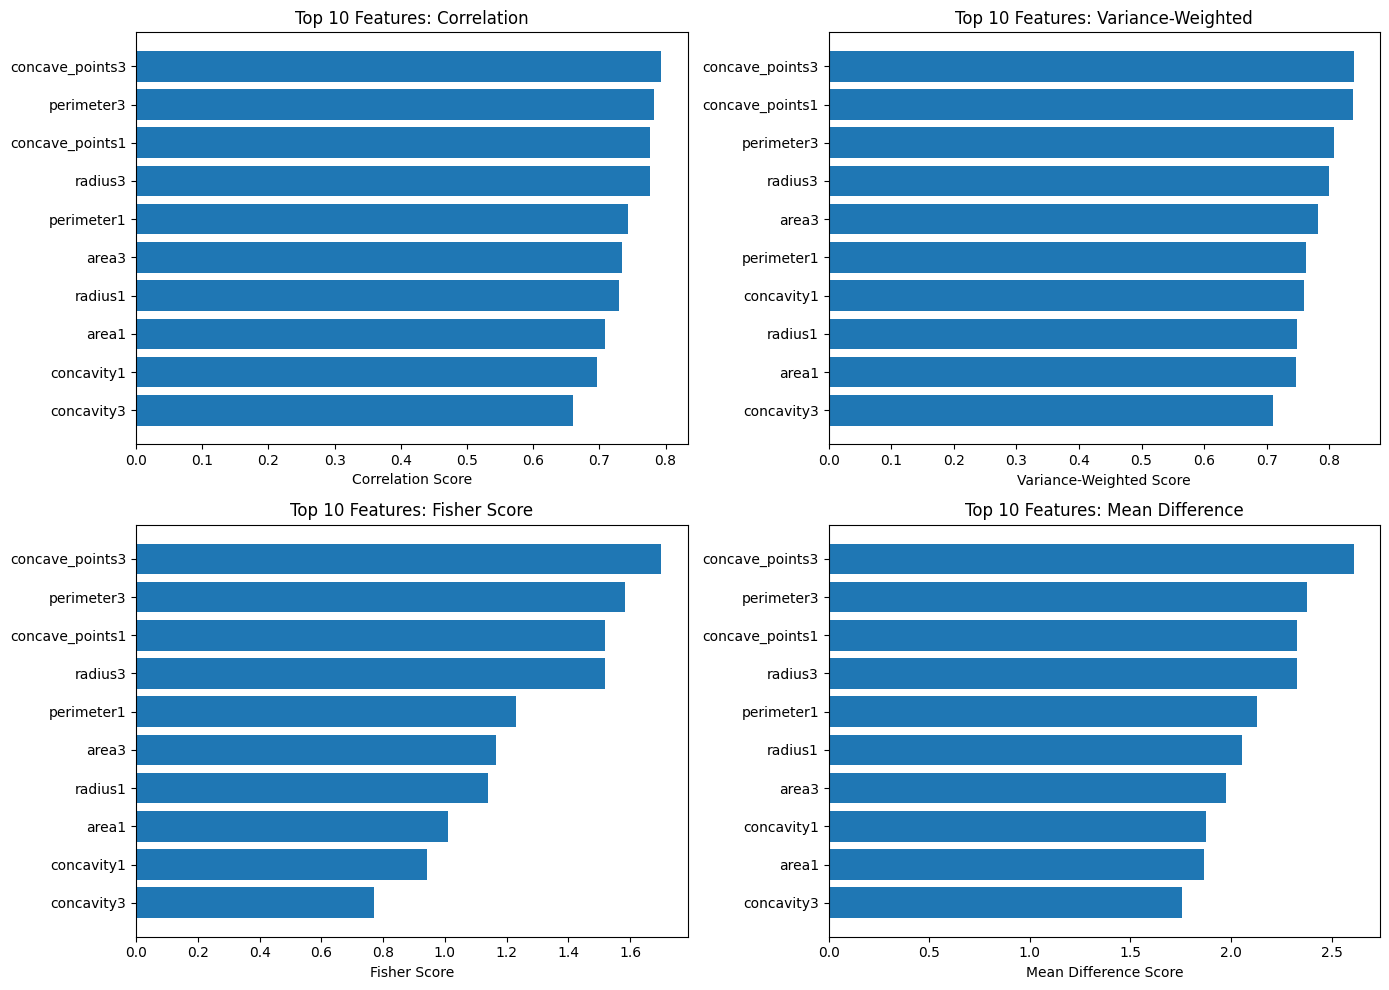


CONSENSUS ANALYSIS
Correlation         : ['concave_points3', 'perimeter3']
Variance-Weighted   : ['concave_points3', 'concave_points1']
Fisher Score        : ['concave_points3', 'perimeter3']
Mean Difference     : ['concave_points3', 'perimeter3']

Feature frequency across methods:
  concave_points3: 4 times
  perimeter3: 3 times
  concave_points1: 1 times

RECOMMENDED TOP 2 FEATURES: ['concave_points3', 'perimeter3']


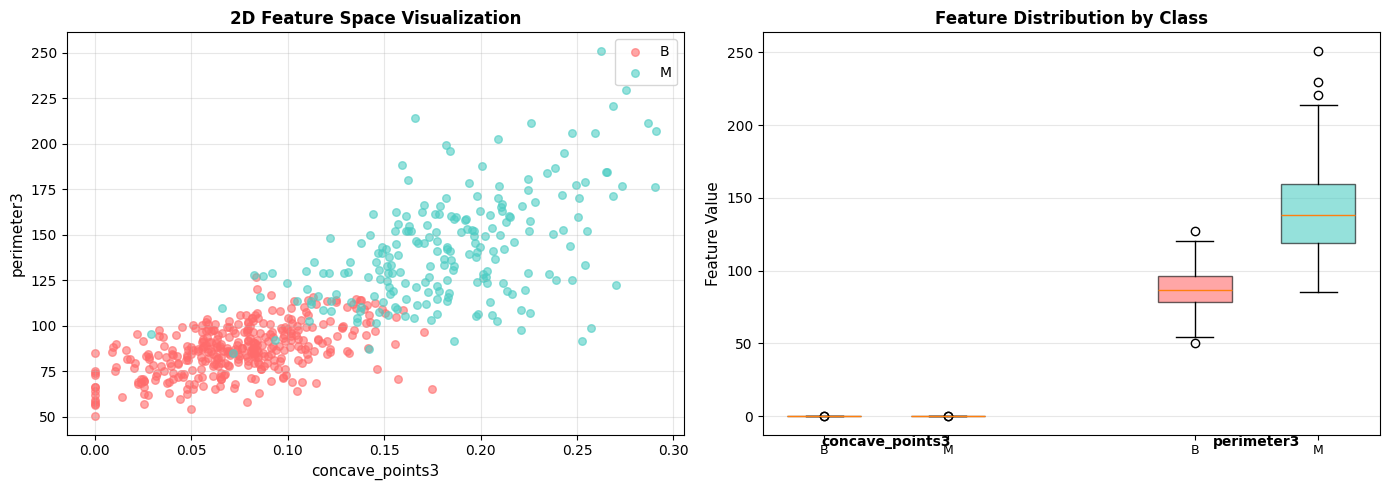


Analysis complete!


In [5]:
# Convert target to 1D array - keep as categories
y = y_df.values.ravel()

# For numerical calculations, create a numeric version
if y.dtype == object or y.dtype == 'O':
    unique_classes = np.unique(y)
    class_mapping = {cls: idx for idx, cls in enumerate(unique_classes)}
    y_numeric = np.array([class_mapping[val] for val in y], dtype=float)
    print(f"Target classes: {unique_classes} -> mapped to {list(class_mapping.values())}")
else:
    y_numeric = y.astype(float)
    unique_classes = np.unique(y)

print("Dataset shape:", X_df.shape)
print("Feature names:", list(X_df.columns)[:5], "...")

# Method 1: Correlation-based Feature Selection
print("\n" + "="*60)
print("METHOD 1: Correlation with Target")
print("="*60)

def calculate_correlation(X: pd.DataFrame, y_numeric: np.ndarray) -> pd.DataFrame:
    """Calculate Pearson correlation between each feature and target."""
    correlations = {}
    y_mean = np.mean(y_numeric)
    y_std = np.std(y_numeric)

    for col in X.columns:
        x = X[col].values
        x_mean = np.mean(x)
        x_std = np.std(x)

        # Pearson correlation
        covariance = np.mean((x - x_mean) * (y_numeric - y_mean))
        correlation = covariance / (x_std * y_std)
        correlations[col] = abs(correlation)

    return pd.DataFrame({
        'Feature': list(correlations.keys()),
        'Correlation': list(correlations.values())
    }).sort_values('Correlation', ascending=False)

corr_scores = calculate_correlation(X_df, y_numeric)
print("\nTop 5 features:")
print(corr_scores.head())

# Method 2: Variance-weighted Correlation
print("\n" + "="*60)
print("METHOD 2: Variance-Weighted Score")
print("="*60)

def variance_weighted_score(X: pd.DataFrame, y_numeric: np.ndarray) -> pd.DataFrame:
    """Score features by correlation weighted by variance."""
    scores = {}
    y_mean = np.mean(y_numeric)
    y_std = np.std(y_numeric)

    for col in X.columns:
        x = X[col].values
        x_mean = np.mean(x)
        x_std = np.std(x)

        # Correlation
        covariance = np.mean((x - x_mean) * (y_numeric - y_mean))
        correlation = abs(covariance / (x_std * y_std))

        # Variance (normalized)
        variance = x_std / x_mean if x_mean != 0 else 0

        # Combined score
        scores[col] = correlation * (1 + 0.1 * variance)

    return pd.DataFrame({
        'Feature': list(scores.keys()),
        'Score': list(scores.values())
    }).sort_values('Score', ascending=False)

var_scores = variance_weighted_score(X_df, y_numeric)
print("\nTop 5 features:")
print(var_scores.head())

# Method 3: Class Separation Score (between-class variance / within-class variance)
print("\n" + "="*60)
print("METHOD 3: Class Separation Score (Fisher Score)")
print("="*60)

def fisher_score(X: pd.DataFrame, y: np.ndarray) -> pd.DataFrame:
    """Calculate Fisher score for each feature."""
    scores = {}
    classes = np.unique(y)

    for col in X.columns:
        x = X[col].values

        # Overall mean
        overall_mean = np.mean(x)

        # Calculate between-class variance
        between_var = 0
        for c in classes:
            x_class = x[y == c]
            n_class = len(x_class)
            class_mean = np.mean(x_class)
            between_var += n_class * (class_mean - overall_mean) ** 2

        # Calculate within-class variance
        within_var = 0
        for c in classes:
            x_class = x[y == c]
            class_mean = np.mean(x_class)
            within_var += np.sum((x_class - class_mean) ** 2)

        # Fisher score
        scores[col] = between_var / (within_var + 1e-10)

    return pd.DataFrame({
        'Feature': list(scores.keys()),
        'Fisher_Score': list(scores.values())
    }).sort_values('Fisher_Score', ascending=False)

fisher_scores = fisher_score(X_df, y)
print("\nTop 5 features:")
print(fisher_scores.head())

# Method 4: Mean Difference Score
print("\n" + "="*60)
print("METHOD 4: Normalized Mean Difference")
print("="*60)

def mean_difference_score(X: pd.DataFrame, y: np.ndarray) -> pd.DataFrame:
    """Score features by normalized mean difference between classes."""
    scores = {}
    classes = np.unique(y)

    if len(classes) == 2:
        for col in X.columns:
            x = X[col].values

            # Means for each class
            mean_0 = np.mean(x[y == classes[0]])
            mean_1 = np.mean(x[y == classes[1]])

            # Standard deviations
            std_0 = np.std(x[y == classes[0]])
            std_1 = np.std(x[y == classes[1]])
            pooled_std = np.sqrt((std_0**2 + std_1**2) / 2)

            # Normalized difference (Cohen's d)
            scores[col] = abs(mean_1 - mean_0) / (pooled_std + 1e-10)

    return pd.DataFrame({
        'Feature': list(scores.keys()),
        'Score': list(scores.values())
    }).sort_values('Score', ascending=False)

diff_scores = mean_difference_score(X_df, y)
print("\nTop 5 features:")
print(diff_scores.head())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Correlation scores
top_n = 10
axes[0, 0].barh(range(top_n), corr_scores.head(top_n)['Correlation'].values)
axes[0, 0].set_yticks(range(top_n))
axes[0, 0].set_yticklabels(corr_scores.head(top_n)['Feature'].values)
axes[0, 0].set_xlabel('Correlation Score')
axes[0, 0].set_title('Top 10 Features: Correlation')
axes[0, 0].invert_yaxis()

# Plot 2: Variance-weighted scores
axes[0, 1].barh(range(top_n), var_scores.head(top_n)['Score'].values)
axes[0, 1].set_yticks(range(top_n))
axes[0, 1].set_yticklabels(var_scores.head(top_n)['Feature'].values)
axes[0, 1].set_xlabel('Variance-Weighted Score')
axes[0, 1].set_title('Top 10 Features: Variance-Weighted')
axes[0, 1].invert_yaxis()

# Plot 3: Fisher scores
axes[1, 0].barh(range(top_n), fisher_scores.head(top_n)['Fisher_Score'].values)
axes[1, 0].set_yticks(range(top_n))
axes[1, 0].set_yticklabels(fisher_scores.head(top_n)['Feature'].values)
axes[1, 0].set_xlabel('Fisher Score')
axes[1, 0].set_title('Top 10 Features: Fisher Score')
axes[1, 0].invert_yaxis()

# Plot 4: Mean difference scores
axes[1, 1].barh(range(top_n), diff_scores.head(top_n)['Score'].values)
axes[1, 1].set_yticks(range(top_n))
axes[1, 1].set_yticklabels(diff_scores.head(top_n)['Feature'].values)
axes[1, 1].set_xlabel('Mean Difference Score')
axes[1, 1].set_title('Top 10 Features: Mean Difference')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# Find consensus features
print("\n" + "="*60)
print("CONSENSUS ANALYSIS")
print("="*60)

top_features = {
    'Correlation': list(corr_scores.head(2)['Feature']),
    'Variance-Weighted': list(var_scores.head(2)['Feature']),
    'Fisher Score': list(fisher_scores.head(2)['Feature']),
    'Mean Difference': list(diff_scores.head(2)['Feature'])
}

for method, features in top_features.items():
    print(f"{method:20}: {features}")

# Count frequency
all_features = []
for features in top_features.values():
    all_features.extend(features)

feature_counts = {}
for feat in all_features:
    feature_counts[feat] = feature_counts.get(feat, 0) + 1

sorted_features = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)
print(f"\nFeature frequency across methods:")
for feat, count in sorted_features[:5]:
    print(f"  {feat}: {count} times")

# Get best 2 features
best_2 = [feat for feat, count in sorted_features[:2]]
print(f"\nRECOMMENDED TOP 2 FEATURES: {best_2}")

# Visualize the selected features
if len(best_2) == 2:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Scatter plot
    colors = ['#FF6B6B', '#4ECDC4']
    classes_to_plot = np.unique(y)
    for i, target_val in enumerate(classes_to_plot):
        mask = y == target_val
        axes[0].scatter(X_df.loc[mask, best_2[0]],
                       X_df.loc[mask, best_2[1]],
                       label=f'{target_val}',
                       alpha=0.6,
                       color=colors[i],
                       s=30)
    axes[0].set_xlabel(best_2[0], fontsize=11)
    axes[0].set_ylabel(best_2[1], fontsize=11)
    axes[0].set_title('2D Feature Space Visualization', fontsize=12, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Box plots
    positions = [0, 1, 3, 4]
    box_data = []
    labels = []
    for i, feat in enumerate(best_2):
        for target_val in classes_to_plot:
            mask = y == target_val
            box_data.append(X_df.loc[mask, feat].values)
            labels.append(f'{feat}\n{target_val}')

    bp = axes[1].boxplot(box_data, positions=positions, patch_artist=True, widths=0.6)
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor(colors[i % 2])
        box.set_alpha(0.6)

    axes[1].set_xticks(positions)
    axes[1].set_xticklabels([f'{classes_to_plot[0]}', f'{classes_to_plot[1]}',
                              f'{classes_to_plot[0]}', f'{classes_to_plot[1]}'], fontsize=9)
    axes[1].set_ylabel('Feature Value', fontsize=11)
    axes[1].set_title('Feature Distribution by Class', fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='y')

    # Add feature labels
    axes[1].text(0.5, axes[1].get_ylim()[0], best_2[0], ha='center', va='top', fontsize=10, fontweight='bold')
    axes[1].text(3.5, axes[1].get_ylim()[0], best_2[1], ha='center', va='top', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

print("\nAnalysis complete!")

### 1.4 Normalizing and Balancing Data for both Training and Testing Sets

Using features: concave_points3 and perimeter3

📊 Total used per class: 212
   - Benign available: 212, Malignant available: 212

📊 Training Set (338 samples):
   - Benign: 169, Malignant: 169
   - Class balance: True ✓

📊 Testing Set (86 samples):
   - Benign: 43, Malignant: 43
   - Class balance: True ✓

📊 Train/Test Ratio: 79.72% / 20.28%
   - Expected: 80% / 20%
   - Correct ratio: False ✓


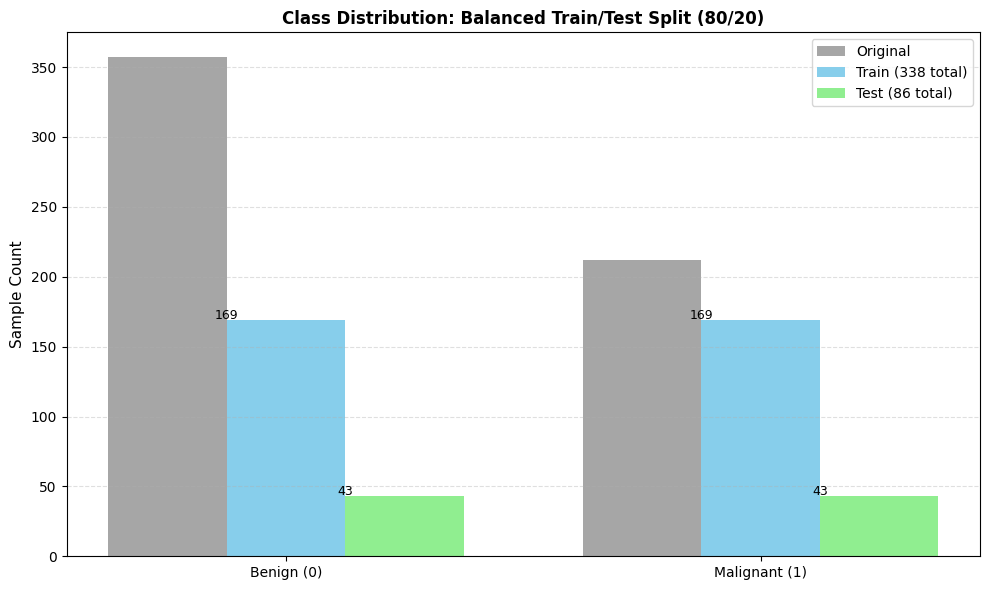

In [6]:
features = best_2
X = X_df[features].to_numpy(dtype=float)

# Convert diagnosis labels: M = 1, B = 0
y_series = y_df.iloc[:, 0].map({'M': 1.0, 'B': 0.0})
y = y_series.to_numpy().reshape(-1, 1)

# Manual normalization (zero mean, unit variance)
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std

# ✅ Separate B and M samples
b_indices = np.where(y.ravel() == 0.0)[0]
m_indices = np.where(y.ravel() == 1.0)[0]

# Shuffle indices
np.random.seed(42)
np.random.shuffle(b_indices)
np.random.shuffle(m_indices)

# ✅ Use min class count to balance both train and test sets
min_class_count = min(len(b_indices), len(m_indices))

# Sample equal numbers of B and M
b_indices = b_indices[:min_class_count]
m_indices = m_indices[:min_class_count]

# ✅ Split each class into 80% train, 20% test (ensuring even distribution)
split = int(0.8 * min_class_count)
b_train, b_test = b_indices[:split], b_indices[split:]
m_train, m_test = m_indices[:split], m_indices[split:]

# Combine B and M for train and test
train_idx = np.concatenate([b_train, m_train])
test_idx = np.concatenate([b_test, m_test])

# Shuffle the final train and test sets
np.random.shuffle(train_idx)
np.random.shuffle(test_idx)

# Final data
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

# ✅ Verify counts and ratios
print(f"Using features: {features[0]} and {features[1]}")
print(f"\n📊 Total used per class: {min_class_count}")
print(f"   - Benign available: {len(b_indices)}, Malignant available: {len(m_indices)}")

print(f"\n📊 Training Set ({len(X_train)} samples):")
b_train_count = np.sum(y_train == 0)
m_train_count = np.sum(y_train == 1)
print(f"   - Benign: {b_train_count}, Malignant: {m_train_count}")
print(f"   - Class balance: {b_train_count == m_train_count} ✓")

print(f"\n📊 Testing Set ({len(X_test)} samples):")
b_test_count = np.sum(y_test == 0)
m_test_count = np.sum(y_test == 1)
print(f"   - Benign: {b_test_count}, Malignant: {m_test_count}")
print(f"   - Class balance: {b_test_count == m_test_count} ✓")

# Verify 80/20 split
train_ratio = len(X_train) / (len(X_train) + len(X_test))
test_ratio = len(X_test) / (len(X_train) + len(X_test))
print(f"\n📊 Train/Test Ratio: {train_ratio:.2%} / {test_ratio:.2%}")
print(f"   - Expected: 80% / 20%")
print(f"   - Correct ratio: {abs(train_ratio - 0.8) < 0.001} ✓")

# ✅ Plot class distributions
class_labels = ['Benign (0)', 'Malignant (1)']
x = np.arange(len(class_labels))
width = 0.25

# Count samples
original_counts = [np.sum(y == 0), np.sum(y == 1)]
train_counts = [b_train_count, m_train_count]
test_counts = [b_test_count, m_test_count]

plt.figure(figsize=(10, 6))
plt.bar(x - width, original_counts, width, label='Original', color='gray', alpha=0.7)
plt.bar(x, train_counts, width, label=f'Train ({len(X_train)} total)', color='skyblue')
plt.bar(x + width, test_counts, width, label=f'Test ({len(X_test)} total)', color='lightgreen')

plt.ylabel("Sample Count", fontsize=11)
plt.title("Class Distribution: Balanced Train/Test Split (80/20)", fontsize=12, fontweight='bold')
plt.xticks(ticks=x, labels=class_labels)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add count labels on bars
for i, v in enumerate(train_counts):
    plt.text(i - width/2, v + 1, str(v), ha='center', fontsize=9)
for i, v in enumerate(test_counts):
    plt.text(i + width/2, v + 1, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## 2️. Neural Network Class

In [7]:
class NeuralNetwork:
    def __init__(self, input_size: int, hidden_size: int, activation: str = 'sigmoid'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.activation_name = activation.lower()

        # Weight initialization
        if self.activation_name == 'relu':
            self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
            self.W2 = np.random.randn(hidden_size, 1) * np.sqrt(2.0 / hidden_size)
        else:
            self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1.0 / input_size)
            self.W2 = np.random.randn(hidden_size, 1) * np.sqrt(1.0 / hidden_size)

        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, 1))

        self.loss_history = []

    # Activation functions
    def sigmoid(self, x): return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    def sigmoid_derivative(self, x): s = self.sigmoid(x); return s * (1 - s)
    def relu(self, x): return np.maximum(0, x)
    def relu_derivative(self, x): return (x > 0).astype(float)
    def tanh(self, x): return np.tanh(x)
    def tanh_derivative(self, x): return 1 - np.tanh(x) ** 2

    def activate(self, x):
        if self.activation_name == 'sigmoid': return self.sigmoid(x)
        elif self.activation_name == 'relu': return self.relu(x)
        elif self.activation_name == 'tanh': return self.tanh(x)
        else: raise ValueError(f"Unknown activation: {self.activation_name}")

    def activate_derivative(self, x):
        if self.activation_name == 'sigmoid': return self.sigmoid_derivative(x)
        elif self.activation_name == 'relu': return self.relu_derivative(x)
        elif self.activation_name == 'tanh': return self.tanh_derivative(x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.activate(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        dz2 = 2 * (self.a2 - y) * self.sigmoid_derivative(self.z2)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = np.dot(dz2, self.W2.T) * self.activate_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate=0.1, verbose=True):
        self.loss_history = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)
            self.backward(X, y, learning_rate)
            if verbose and (epoch % 100 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch}/{epochs}, Loss: {loss:.6f}")

    def predict(self, X, threshold=0.5):
        y_pred = self.forward(X)
        return (y_pred >= threshold).astype(int)

    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

### 2.1 Train the network

In [8]:
activation = 'sigmoid' # Choose: 'sigmoid', 'relu', or 'tanh'
hidden_neurons = 4 # 2–4 neurons
epochs = 1000 # Dynamic, can be changed
learning_rate = 0.05

nn = NeuralNetwork(input_size=2, hidden_size=hidden_neurons, activation=activation)
nn.train(X_train, y_train, epochs=epochs, learning_rate=learning_rate)

Epoch 0/1000, Loss: 0.227151


Epoch 100/1000, Loss: 0.208887
Epoch 200/1000, Loss: 0.191011
Epoch 300/1000, Loss: 0.172717
Epoch 400/1000, Loss: 0.154727
Epoch 500/1000, Loss: 0.137987
Epoch 600/1000, Loss: 0.123228
Epoch 700/1000, Loss: 0.110764
Epoch 800/1000, Loss: 0.100536
Epoch 900/1000, Loss: 0.092266
Epoch 999/1000, Loss: 0.085671


### 2.2 Evaluate


 Model accuracy: 94.19% using SIGMOID activation


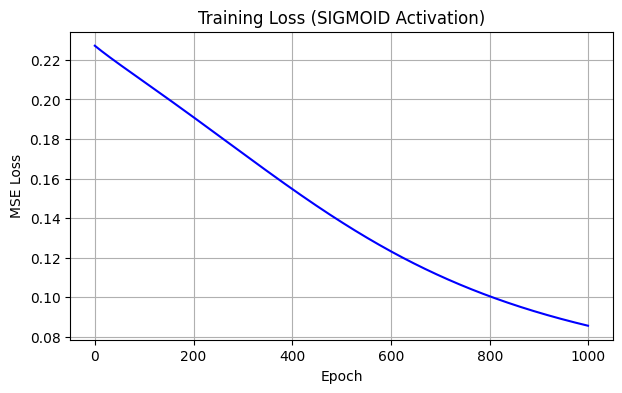

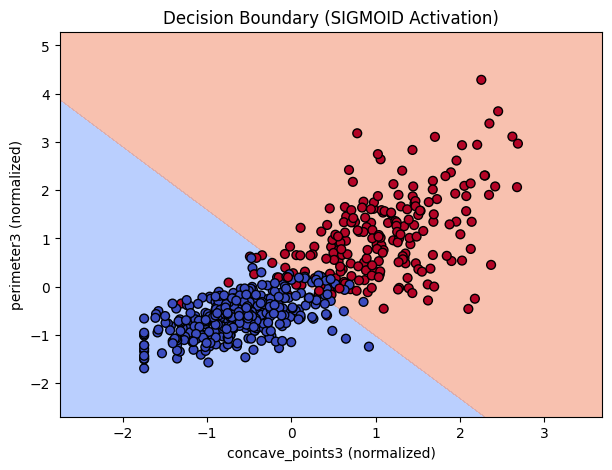

In [9]:
acc = nn.accuracy(X_test, y_test)
print(f"\n Model accuracy: {acc * 100:.2f}% using {activation.upper()} activation")

# --- Plot loss curve ---
plt.figure(figsize=(7, 4))
plt.plot(nn.loss_history, color='blue')
plt.title(f"Training Loss ({activation.upper()} Activation)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# --- Plot decision boundary ---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = nn.forward(grid).reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='coolwarm', edgecolor='k', s=40)
plt.title(f"Decision Boundary ({activation.upper()} Activation)")
plt.xlabel(f"{features[0]} (normalized)")
plt.ylabel(f"{features[1]} (normalized)")
plt.show()

## Test new data points (n samples)


🔎 Predictions for 50 New Data Points:

 Sample #  concave_points3 (normalized)  perimeter3 (normalized) Predicted Class
        1                         -1.88                    -0.39          Benign
        2                         -1.11                    -0.22          Benign
        3                         -1.10                    -0.11          Benign
        4                         -1.27                    -1.17          Benign
        5                         -0.58                    -0.75          Benign
        6                         -1.63                    -0.50          Benign
        7                         -1.10                    -0.25          Benign
        8                         -0.64                    -0.47          Benign
        9                         -1.35                    -0.41          Benign
       10                         -0.93                    -0.33          Benign
       11                         -1.35                    -0.62     

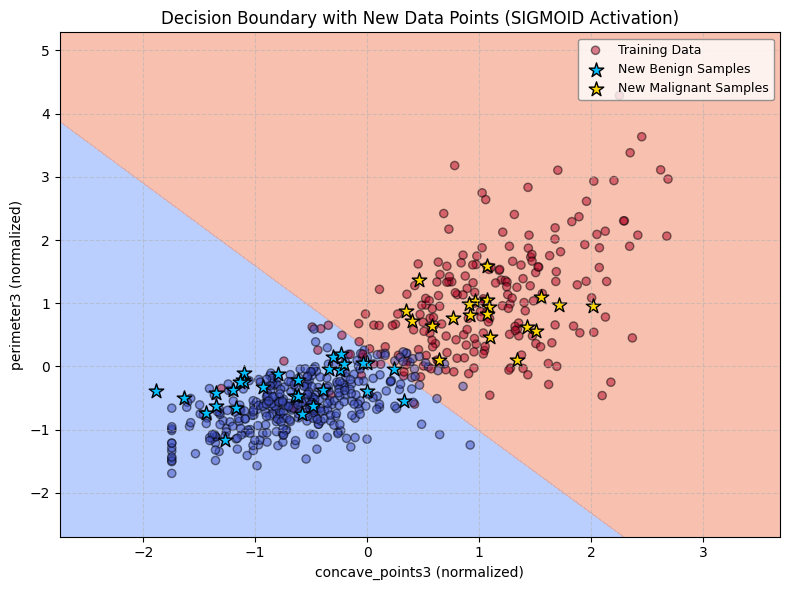

In [10]:
# ✅ Adjust how many synthetic samples you want per class
n_samples = 20

# Generate synthetic data (in normalized space)
benign_data_norm = np.random.normal(loc=[-1.0, -0.5], scale=[0.4, 0.3], size=(n_samples, 2))
malignant_data_norm = np.random.normal(loc=[+1.0, +0.8], scale=[0.4, 0.3], size=(n_samples, 2))

# ✅ Generate boundary samples (near the decision boundary)
boundary_data_norm = np.random.normal(loc=[0.0, 0.0], scale=[0.3, 0.3], size=(int(n_samples / 2), 2))

# Combine all new data
new_data_norm = np.vstack([benign_data_norm, malignant_data_norm, boundary_data_norm])

# Predict with trained model
predictions = nn.predict(new_data_norm)
labels = np.array(["Malignant" if p == 1 else "Benign" for p in predictions.flatten()])

# --- Print predictions ---
pred_df = pd.DataFrame({
    "Sample #": np.arange(1, len(new_data_norm) + 1),
    f"{features[0]} (normalized)": new_data_norm[:, 0].round(2),
    f"{features[1]} (normalized)": new_data_norm[:, 1].round(2),
    "Predicted Class": labels
})

print(f"\n🔎 Predictions for {len(new_data_norm)} New Data Points:\n")
print(pred_df.to_string(index=False))

# --- Visualize predictions on the decision boundary ---
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.6)

# Plot original training data
plt.scatter(
    X[:, 0], X[:, 1],
    c=y[:, 0],
    cmap='coolwarm',
    edgecolor='k',
    s=35,
    alpha=0.5,
    label="Training Data"
)

# Mask by prediction
benign_mask = labels == "Benign"
malignant_mask = labels == "Malignant"

# Plot all new samples (including boundary) by predicted class
plt.scatter(
    new_data_norm[benign_mask, 0],
    new_data_norm[benign_mask, 1],
    c='deepskyblue',
    edgecolor='k',
    marker='*',
    s=120,
    label='New Benign Samples'
)

plt.scatter(
    new_data_norm[malignant_mask, 0],
    new_data_norm[malignant_mask, 1],
    c='gold',
    edgecolor='k',
    marker='*',
    s=120,
    label='New Malignant Samples'
)

# Final plot styling
plt.title(f"Decision Boundary with New Data Points ({activation.upper()} Activation)")
plt.xlabel(f"{features[0]} (normalized)")
plt.ylabel(f"{features[1]} (normalized)")
plt.legend(
    loc='upper right',
    frameon=True,
    facecolor='white',
    edgecolor='gray',
    fontsize=9
)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
